In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Reshape and normalize the input data
x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype('float32') / 255

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.12, random_state=42)

# Convert the target labels to categorical format
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)
y_test = keras.utils.to_categorical(y_test)

# Define the neural network model
model = keras.Sequential()
model.add(keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))



Epoch 1/10
413/413 [==============================] - 5s 11ms/step - loss: 0.2782 - accuracy: 0.9220 - val_loss: 0.1561 - val_accuracy: 0.9532
Epoch 2/10
413/413 [==============================] - 5s 12ms/step - loss: 0.1148 - accuracy: 0.9669 - val_loss: 0.1019 - val_accuracy: 0.9711
Epoch 3/10
413/413 [==============================] - 5s 11ms/step - loss: 0.0754 - accuracy: 0.9773 - val_loss: 0.0896 - val_accuracy: 0.9731
Epoch 4/10
413/413 [==============================] - 5s 11ms/step - loss: 0.0542 - accuracy: 0.9842 - val_loss: 0.0760 - val_accuracy: 0.9772
Epoch 5/10
413/413 [==============================] - 5s 13ms/step - loss: 0.0397 - accuracy: 0.9887 - val_loss: 0.0700 - val_accuracy: 0.9794
Epoch 6/10
413/413 [==============================] - 5s 11ms/step - loss: 0.0304 - accuracy: 0.9916 - val_loss: 0.0678 - val_accuracy: 0.9808
Epoch 7/10
413/413 [==============================] - 5s 13ms/step - loss: 0.0224 - accuracy: 0.9937 - val_loss: 0.0713 - val_accuracy: 0.9787

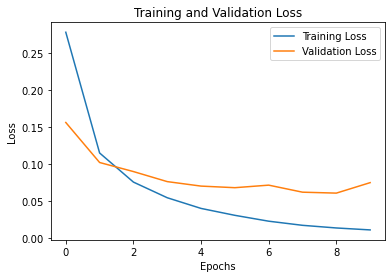

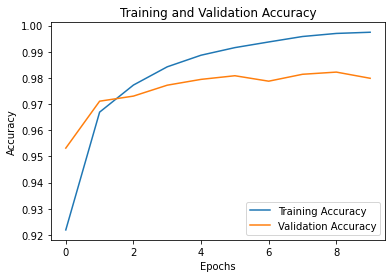

In [2]:

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


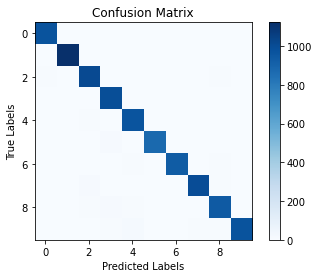

In [3]:


# Predict using the model
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()
plt.show()

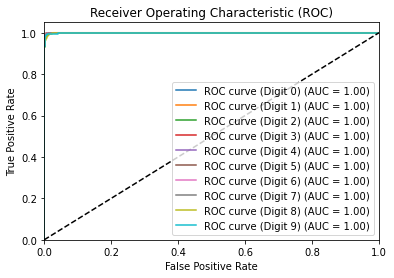

In [4]:

# Compute ROC curve and area under curve (AUC)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='ROC curve (Digit %d) (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



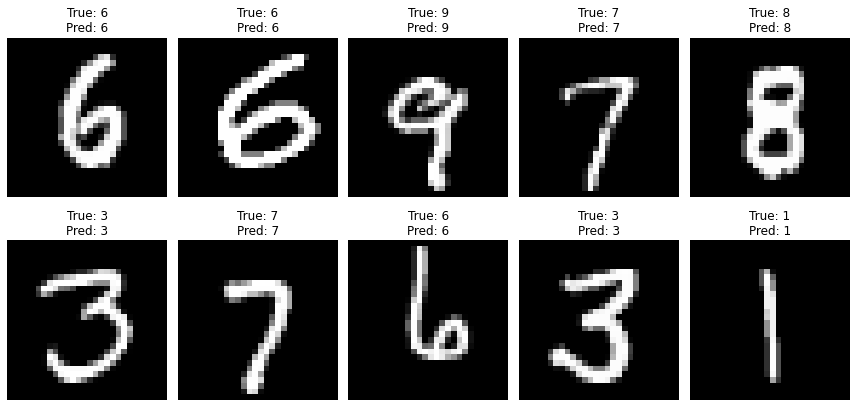

In [5]:
# Select random samples for prediction visualization
num_samples = 10
random_indices = np.random.choice(range(len(x_test)), num_samples, replace=False)
x_sample = x_test[random_indices]
y_sample_true = y_test[random_indices]
y_sample_pred = y_pred[random_indices]

# Plot sample predictions
fig, axes = plt.subplots(nrows=2, ncols=num_samples//2, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_sample[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {np.argmax(y_sample_true[i])}\nPred: {np.argmax(y_sample_pred[i])}')
    ax.axis('off')
plt.tight_layout()
plt.show()


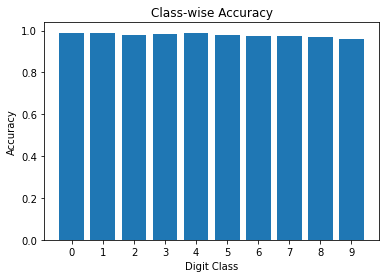

In [6]:
# Compute class-wise accuracy
class_acc = np.diagonal(cm) / np.sum(cm, axis=1)

# Plot class-wise accuracy
plt.bar(range(10), class_acc)
plt.xticks(range(10), range(10))
plt.xlabel('Digit Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.show()
